In [1]:
%load_ext gvmagic

In [25]:
import dep
reload(dep)

#################################################################

j = dep.Jobs()
cur_time = 100
pending_objs = []
def roast_transform(inputs, outputs):
    print("roast {} -> {}".format(inputs, outputs))
    for obj in outputs:
        pending_objs.append(obj.props)

def roast_template(input_object, obj_set):
    if input_object.get("type") == "raw":
        output = obj_set.clone_with(input_object.id, type="roasted")
        return [( (input_object,), (output,), roast_transform) ]
    return []

def brew_transform(inputs, outputs):
    print("brew {} -> {}".format(inputs, outputs))
    for obj in outputs:
        pending_objs.append(obj.props)

def brew_template(input_object, obj_set):
    if input_object.get("type") == "roasted":
        platemap = input_object.get("platemap")
        inputs = obj_set.query(dict(platemap=platemap))
        inputs = [x for x in inputs if x.get("type") == "roasted"]
        output = obj_set.get(obj_set.add(dict(platemap=platemap, type="brewed", name=platemap)))
        return [( tuple(inputs), (output,), brew_transform) ]
    return []

def simulate(j, new_obj):
    global cur_time

    pending_objs.append(new_obj)
    while len(pending_objs) > 0:
        cur_time += 1

        p = pending_objs[0]
        del pending_objs[0]

        #print("time: {} adding: {}".format(cur_time, p))
        j.add_obj( p, cur_time )
        rules_to_start = j.get_rules_by_state(dep.READY)
        for rule in rules_to_start:
            #print("time: {} start: {}".format(cur_time, rule))
            rule.transform(rule.inputs, rule.outputs)

j.add_template(roast_template)
j.add_template(brew_template)

simulate(j, [("name", "100"), ("type", "raw"), ("platemap", "a")] )


roast (<0 {'type': 'raw', 'name': '100', 'platemap': 'a'}>,) -> (<1 {'type': 'roasted', 'name': '100', 'platemap': 'a'}>,)
brew (<1 {'type': 'roasted', 'name': '100', 'platemap': 'a'}>,) -> (<2 {'type': 'brewed', 'name': 'a', 'platemap': 'a'}>,)


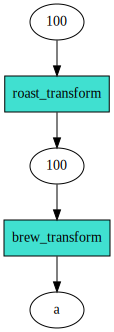

In [26]:
%dotstr j.to_dot()

roast (<3 {'type': 'raw', 'name': '200', 'platemap': 'a'}>,) -> (<4 {'type': 'roasted', 'name': '200', 'platemap': 'a'}>,)
brew (<1 {'type': 'roasted', 'name': '100', 'platemap': 'a'}>, <4 {'type': 'roasted', 'name': '200', 'platemap': 'a'}>) -> (<2 {'type': 'brewed', 'name': 'a', 'platemap': 'a'}>,)


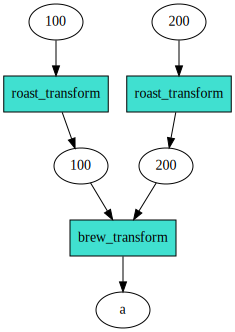

In [27]:
simulate(j, [("name", "200"), ("type", "raw"), ("platemap", "a")] )
%dotstr j.to_dot()


roast (<9 {'type': 'raw', 'name': '300', 'platemap': 'b'}>,) -> (<10 {'type': 'roasted', 'name': '300', 'platemap': 'b'}>,)
brew (<7 {'type': 'roasted', 'name': '400', 'platemap': 'b'}>, <10 {'type': 'roasted', 'name': '300', 'platemap': 'b'}>) -> (<8 {'type': 'brewed', 'name': 'b', 'platemap': 'b'}>,)


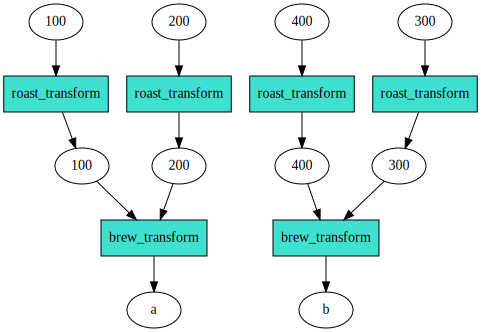

In [30]:
simulate(j, [("name", "300"), ("type", "raw"), ("platemap", "b")] )
%dotstr j.to_dot()


roast (<6 {'type': 'raw', 'name': '400', 'platemap': 'b'}>,) -> (<7 {'type': 'roasted', 'name': '400', 'platemap': 'b'}>,)
brew (<7 {'type': 'roasted', 'name': '400', 'platemap': 'b'}>, <10 {'type': 'roasted', 'name': '300', 'platemap': 'b'}>) -> (<8 {'type': 'brewed', 'name': 'b', 'platemap': 'b'}>,)


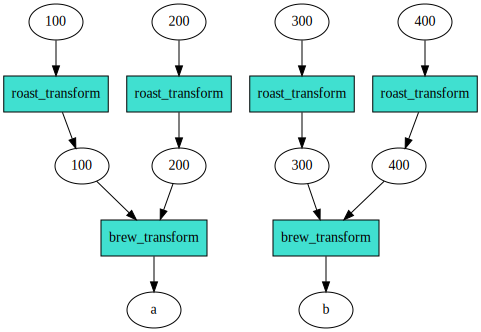

In [31]:
simulate(j, [("name", "400"), ("type","raw"), ("platemap", "b")] )
%dotstr j.to_dot()